# NAME   - J SAI KUMAR
    TASK 2 - MOVIE RECOMMENDATION SYSTEM
    DOMAIN - MACHINE LEARNING


## ABOUT DATASET

The Dataset contains three columns such as 
    1. movieid
    2. Title
    3. genres
    4. ratings
with 10329 rows of records respectively


### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error


### LOAD DATASET

In [2]:
df =  pd.read_csv('movies.csv')

In [3]:
df


,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,1
10325,146878,Le Grand Restaurant (1966),Comedy,2
10326,148238,A Very Murray Christmas (2015),Comedy,0
10327,148626,The Big Short (2015),Drama,2


In [4]:
df.head()

,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [5]:
df.tail()

,movieId,title,genres,Ratings
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,1
10325,146878,Le Grand Restaurant (1966),Comedy,2
10326,148238,A Very Murray Christmas (2015),Comedy,0
10327,148626,The Big Short (2015),Drama,2
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),3


In [6]:
df.shape

(10329, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   Ratings  10329 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 322.9+ KB


In [8]:
df.columns

Index(['movieId', 'title', 'genres', 'Ratings'], dtype='object')

### SUMMARIZATION

In [9]:
df.describe(include = 'all')

,movieId,title,genres,Ratings
count,10329.000000,10329,10329,10329.000000
unique,NaN,10327,938,NaN
top,NaN,War of the Worlds (2005),Drama,NaN
freq,NaN,2,1385,NaN
mean,31924.282893,NaN,NaN,1.554652
std,37734.741149,NaN,NaN,1.065596
min,1.000000,NaN,NaN,0.000000
25%,3240.000000,NaN,NaN,1.000000
50%,7088.000000,NaN,NaN,2.000000
75%,59900.000000,NaN,NaN,2.000000


In [10]:
df.describe(include = 'number')

,movieId,Ratings
count,10329.000000,10329.000000
mean,31924.282893,1.554652
std,37734.741149,1.065596
min,1.000000,0.000000
25%,3240.000000,1.000000
50%,7088.000000,2.000000
75%,59900.000000,2.000000
max,149532.000000,3.000000


In [11]:
df.describe(include = 'object')

,title,genres
count,10329,10329
unique,10327,938
top,War of the Worlds (2005),Drama
freq,2,1385


### PREPROCESSING OF DATASET

In [12]:
#lets check the missing values
df.isnull().sum()

movieId    0
title      0
genres     0
Ratings    0
dtype: int64

In [13]:
#lets see missing values in percentage format
missing_values = df.isnull().sum()
missing_vallues = df.isnull().sum().sort_values(ascending= False)
percent = ((df.isnull().sum()/df.shape[0]*100))
percent= percent.sort_values(ascending = False)
missing_data = pd.concat([missing_values,percent],axis = 1,
                        keys = ['Total Missing Values', 'Percentage of missing values'])
missing_data['Type of data'] = df[missing_data.index].dtypes
missing_data

,Total Missing Values,Percentage of missing values,Type of data
movieId,0,0.0,int64
title,0,0.0,object
genres,0,0.0,object
Ratings,0,0.0,int64


<AxesSubplot:>

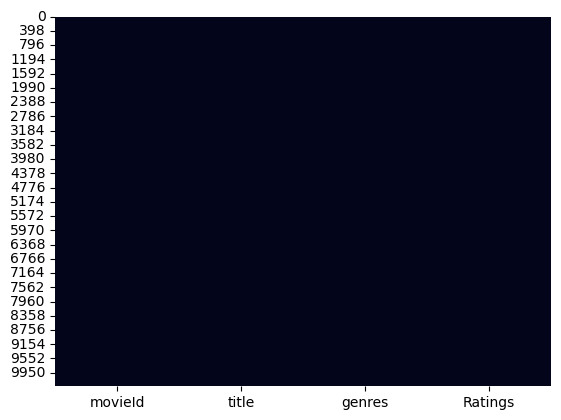

In [14]:
#lets plot this null values in heatmap of seaborn
sns.heatmap(df.isnull(),cbar = False)

The Dataset doesn't have any NaN values

In [15]:
#lets check for any duplicates values

In [16]:
df.duplicated().sum()
#the dataset doesn't has any duplicated values

0

In [17]:
#lets try to remove the duplicates
df.drop_duplicates(inplace = True)

In [18]:
df


,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,1
10325,146878,Le Grand Restaurant (1966),Comedy,2
10326,148238,A Very Murray Christmas (2015),Comedy,0
10327,148626,The Big Short (2015),Drama,2


### DATA VISUALIZATION

In [19]:
#LETS visualize for ratings column with respective density


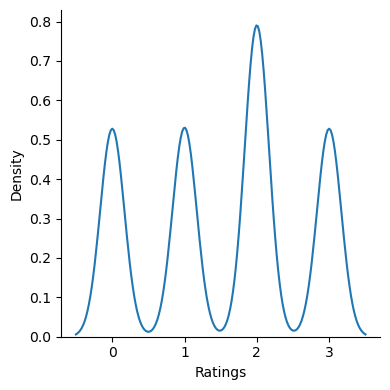

In [20]:
sns.displot(data=df, x='Ratings', kind='kde', aspect=1, height=4)

### DATA TRANSFORMATION INTO PIVOT

In [21]:

# Convert the dataframe into a pivot table
user_item_matrix = pd.pivot_table(df,index=df.index, columns='movieId', values='Ratings', fill_value=0)

In [22]:
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
10326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


### PIVOT TABLE TO SPARSE MATRIX

In [23]:
# Convert the pivot table to a sparse matrix
user_item_matrix = csr_matrix(user_item_matrix.values)

In [24]:
user_item_matrix

<10329x10329 sparse matrix of type '<class 'numpy.int64'>'
	with 8035 stored elements in Compressed Sparse Row format>

### MODEL TRAINING

In [25]:
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
def get_movie_recommendations(movie_id, num_recommendations):
    # Find the k nearest neighbors of the movie
    distances, indices = model.kneighbors(user_item_matrix[movie_id], n_neighbors=num_recommendations+1)

    # Get the indices of the recommended movies
    recommended_movie_indices = indices.squeeze()[1:]

    # Get the titles of the recommended movies
    recommended_movie_titles = df.loc[recommended_movie_indices, 'title']

    return recommended_movie_titles

### TEST THE MODEL

In [42]:
# Test the model by getting recommendations for a movie
movie_id = int(input("Enter Movie ID: "))
num_recom=int(input("how many movie recommendations you want? = "))
print("-----------------------------------------------------")
print("here is the list of",num_recom,"movies for you based on movie_id",movie_id)
print("-----------------------------------------------------")
recommended_movies = get_movie_recommendations(movie_id,num_recom)
print(recommended_movies)

Enter Movie ID: 48
how many movie recommendations you want? = 5
-----------------------------------------------------
here is the list of 5 movies for you based on movie_id 48
-----------------------------------------------------
6886                                     Ted Bundy (2002)
6885                                 49th Parallel (1941)
6887                     District 13 (Banlieue 13) (2004)
6889                                        Hostel (2005)
6884    Lady Vengeance (Sympathy for Lady Vengeance) (...
Name: title, dtype: object


In [43]:
# Assume the following are the actual ratings for the recommended movies by a user
actual_ratings = [0, 3, 2, 0, 1]

# Calculate the mean absolute error and root mean squared error
predicted_ratings = [df.loc[df['title'] == title, 'Ratings'].mean() for title in recommended_movies]

mae = mean_absolute_error(actual_ratings, predicted_ratings)
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.2
Root Mean Squared Error: 0.4472135954999579


### ACCURACY OF THE MODEL

In [44]:
#checking the accuracy  of the model
accuracy = 1 - (mae / max(actual_ratings))

print(f'Accuracy: {accuracy * 100}%')

Accuracy: 93.33333333333333%
